In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('mall-customers-data.csv')

In [ ]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.gender=df.gender.map({'Male':1,'Female':0})

In [ ]:
df.drop('customer_id',axis=1)

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

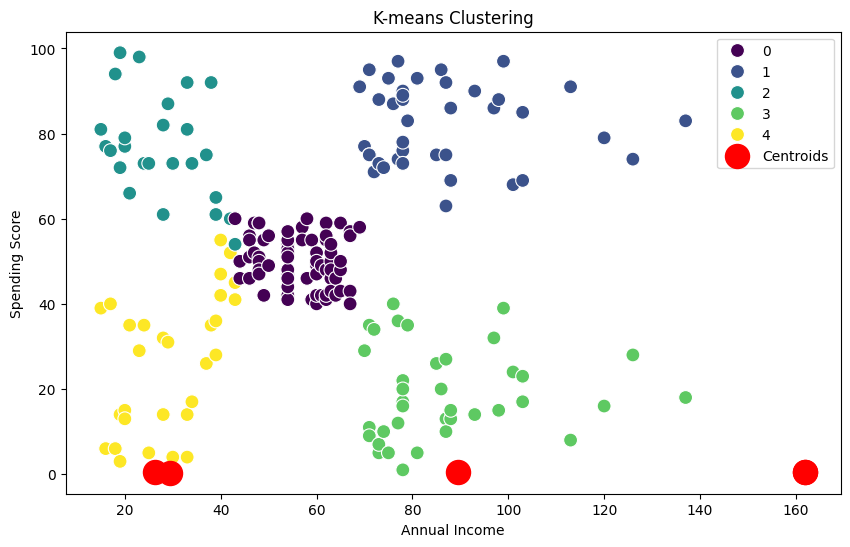

In [ ]:
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

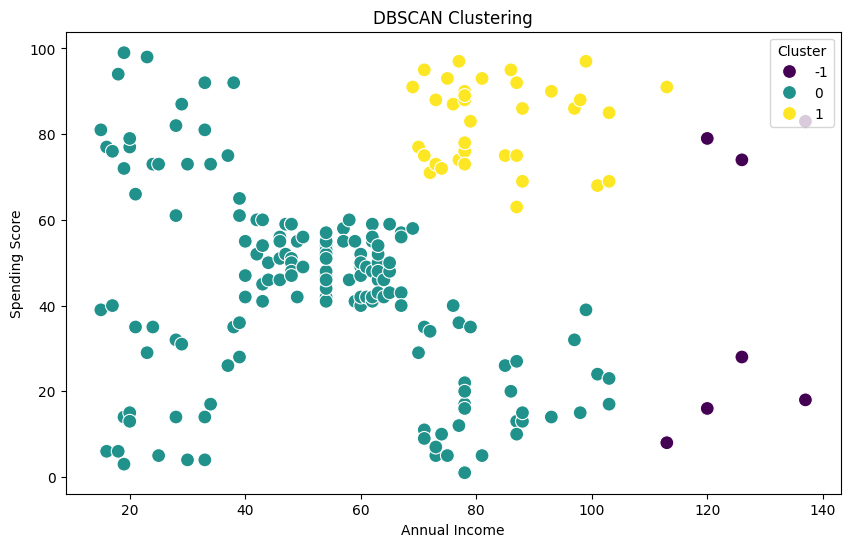

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['annual_income', 'spending_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster', loc='upper right')
plt.show()
